# Tugas Besar IF2220 Probabilitas dan Statistika

### Penarikan Kesimpulan dan Pengujian Hipotesis

### Author

- Vieri Fajar Firdaus / 13521099
- Saddam Annais Shaquille / 13521121


### Inisialisasi library dan data


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Latex
from scipy import stats as st
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

anggur = pd.read_csv('anggur.csv')

### Column Description

- Fixed acidity (keasaman tetap): jumlah asam yang terkandung dalam anggur yang tidak mudah menguap.
- Volatile acidity (keasaman mudah menguap): jumlah asam yang terkandung dalam anggur yang mudah menguap.
- Citric acid (asam sitrat): jumlah asam sitrat yang terkandung dalam anggur.
- Residual sugar (gula sisa): jumlah gula yang tersisa setelah fermentasi selesai.
- Chlorides (klorida): jumlah garam klorida yang terkandung dalam anggur.
- Free sulfur dioxide (sulfur dioksida bebas): jumlah sulfur dioksida bebas yang terkandung dalam anggur.
- Total sulfur dioxide (total sulfur dioksida): jumlah sulfur dioksida total yang terkandung dalam anggur.
- Density (densitas): berat relatif anggur dibandingkan dengan air murni pada 20 derajat Celsius.
- pH: tingkat keasaman pada skala 0 hingga 14.
- Sulphates (sulfat): jumlah sulfat yang terkandung dalam anggur.
- Alcohol (alkohol): persentase alkohol dalam anggur.
- Quality (kualitas): skor kualitas antara 0 dan 10 berdasarkan data sensorik.


### 1. Menuliskan deskripsi statistika (_descriptive statistics_) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR (_interquartile range_), _skewness_, dan _kurtosis_.


In [23]:
# untuk mengetahui tipe data dari setiap kolom
display(Markdown('**Tipe data setiap kolom**'))
anggur.info()

**Tipe data setiap kolom**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [24]:
display(Markdown('**Deskripsi dari setiap kolom**'))
df = pd.DataFrame()
df['Mean'] = anggur.mean()
df['Median'] = anggur.median()
df['Standar Deviasi'] = anggur.std()
df['Variasi'] = anggur.var()
df['Range'] = anggur.max()-anggur.min()
df['Kuartil 1'] = anggur.quantile(0.25)
df['Kuartil 2'] = anggur.quantile(0.5)
df['Kuartil 3'] = anggur.quantile(0.75)
df['IQR'] = df['Kuartil 3']-df['Kuartil 1']
df['Skewness'] = anggur.skew()
df['Kurtosis'] = anggur.kurtosis()
df

**Deskripsi dari setiap kolom**

,Mean,Median,Standar Deviasi,Variasi,Range,Kuartil 1,Kuartil 2,Kuartil 3,IQR,Skewness,Kurtosis
fixed acidity,7.152530,7.150000,1.201598,1.443837,8.170000,6.377500,7.150000,8.000000,1.622500,-0.028879,-0.019292
volatile acidity,0.520839,0.524850,0.095848,0.009187,0.665200,0.456100,0.524850,0.585375,0.129275,-0.197699,0.161853
citric acid,0.270517,0.272200,0.049098,0.002411,0.292900,0.237800,0.272200,0.302325,0.064525,-0.045576,-0.104679
residual sugar,2.567104,2.519430,0.987915,0.975977,5.518200,1.896330,2.519430,3.220873,1.324544,0.132638,-0.042980
chlorides,0.081195,0.082167,0.020111,0.000404,0.125635,0.066574,0.082167,0.095312,0.028738,-0.051319,-0.246508
free sulfur dioxide,14.907679,14.860346,4.888100,23.893519,27.267847,11.426717,14.860346,18.313098,6.886381,0.007130,-0.364964
total sulfur dioxide,40.290150,40.190000,9.965767,99.316519,66.810000,33.785000,40.190000,47.022500,13.237500,-0.024060,0.063950
density,0.995925,0.996000,0.002020,0.000004,0.013800,0.994600,0.996000,0.997200,0.002600,-0.076883,0.016366
pH,3.303610,3.300000,0.104875,0.010999,0.740000,3.230000,3.300000,3.370000,0.140000,0.147673,0.080910
sulphates,0.598390,0.595000,0.100819,0.010164,0.670000,0.530000,0.595000,0.670000,0.140000,0.149199,0.064819


In [25]:
display(Markdown('**Deskripsi modus dari setiap kolom**'))
list_mode=[]
for i in range(12) :
    if(len(anggur[anggur.columns[i]].mode())==1000) :
        list_mode.append("Semua data merupakan modus")
    else :
        value=""
        for j in range(len(anggur[anggur.columns[i]].mode())) :
            if(j==len(anggur[anggur.columns[i]].mode())-1) :
                value=value+str(anggur[anggur.columns[i]].mode()[j])
            else :
                value=value+str(anggur[anggur.columns[i]].mode()[j])+", "
        list_mode.append(value)

df_mode = pd.DataFrame(list_mode, columns =['Modus'],index=anggur.columns) 
df_mode


**Deskripsi modus dari setiap kolom**

,Modus
fixed acidity,6.54
volatile acidity,0.5546
citric acid,0.3019
residual sugar,Semua data merupakan modus
chlorides,Semua data merupakan modus
free sulfur dioxide,Semua data merupakan modus
total sulfur dioxide,"35.2, 37.25, 39.64, 40.61, 41.05, 41.59, 44.51"
density,"0.9959, 0.9961, 0.9965, 0.997"
pH,3.34
sulphates,0.59


### 2. Membuat Visualisasi plot distribusi dalam bentuk histogram dan boxplot untuk setiap kolom numerik.


In [26]:
# Make a function to show the histogram and box plots
def hist_box_plot(df: pd.DataFrame, column: str) -> None:
    fig, (ax1, ax2) = plt.subplots(
        nrows=2, ncols=1, figsize=(10, 5), sharex=True)
    g1 = sns.histplot(data=df, x=column, ax=ax1, color="#03C988",
                      kde=True, line_kws={"linewidth": 1.5, "alpha": 1})
    g1.lines[0].set_color('#DF7857')
    g2 = sns.boxplot(data=df, x=column, ax=ax2, color="#03C988", flierprops={
                     "marker": 'o', "markersize": 5, "markeredgecolor": 'black', "markerfacecolor": 'white', "alpha": 0.6})
    g1.set(xlabel=None)
    g1.set(ylabel=None)
    g2.set(xlabel=None)
    g2.set(ylabel=None)
    fig.suptitle(column, y=0.95, fontsize=17)

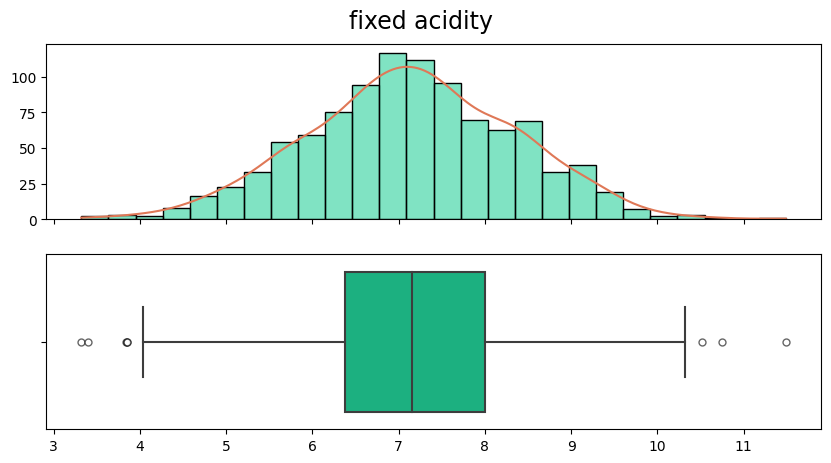

In [27]:
# Untuk kolom fixed acidity
hist_box_plot(anggur, anggur.columns[0])


- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan condong kiri (_negative skewed_) yang hampir tidak terlihat.
- Berdasarkan boxplot, terlihat bahwa data fix acidity memiliki rentang nilai yang cukup beragam.
- Nilai minimumnya hampir mendekati 4 dan maksimumnya melebihi 10 serta mediannya sedikit di atas 7
- Terdapat beberapa _outliers_ yang terlihat di bawah nilai minimum maupun di atas nilai maksimum.


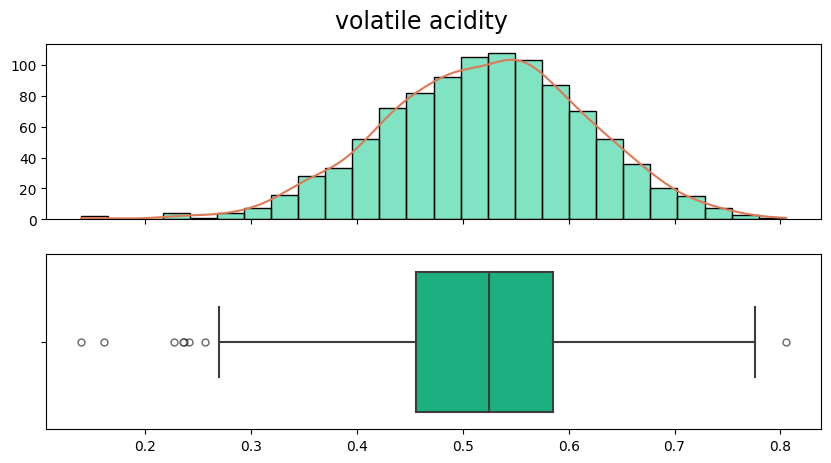

In [28]:
# Untuk kolom volatile acidity
hist_box_plot(anggur, anggur.columns[1])


- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan sedikit condong kanan (_positive skewed_).
- Berdasarkan boxplot, terlihat bahwa data _volatile acidity_ memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya kurang dari 0.3 dan maksimumnya kurang dari 0.8 serta mediannya sedikit di atas 0.5.
- Terdapat 1 _outliers_ yang terlihat di atas nilai maksimum dan beberapa lainnya di bawah nilai minimum.


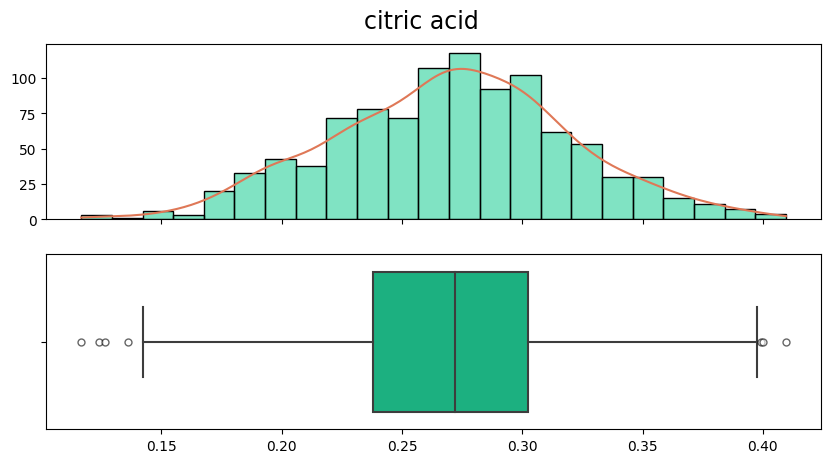

In [29]:
# Untuk kolom citric acid
hist_box_plot(anggur, anggur.columns[2])


- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan sedikit condong kiri (_negative skewed_).
- Berdasarkan boxplot, terlihat bahwa data _citric acid_ memiliki rentang sangat kecil.
- Nilai minimumnya kurang dari 0.15 dan maksimumnya kurang dari 0.4 serta mediannya di antara 0.25 dan 0.30.
- Terdapat beberapa _outliers_ yang terlihat di atas nilai maksimum dan beberapa lainnya di bawah nilai minimum.


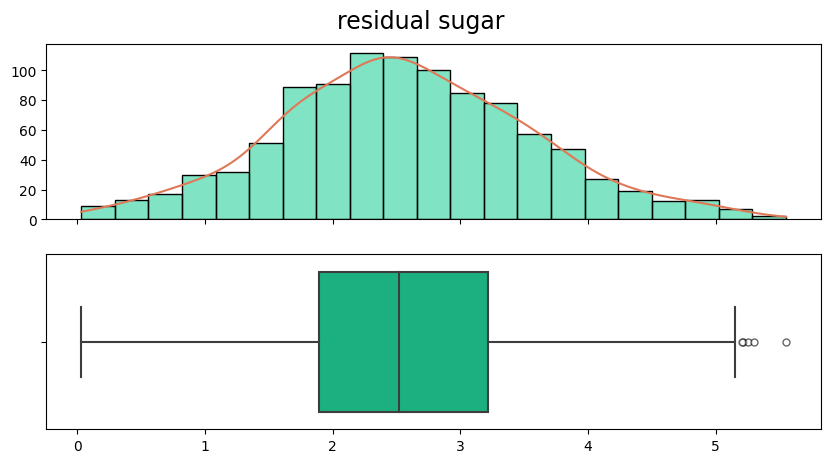

In [30]:
# Untuk kolom residual sugar
hist_box_plot(anggur, anggur.columns[3])


- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan sedikit condong kiri (_negative skewed_).
- Berdasarkan boxplot, terlihat bahwa data _residual sugar_ memiliki rentang nilai yang cukup kecil.
- Nilai minimumnya 0 dan maksimumnya sedikit lebih dari 5 serta mediannya di antara 2 dan 3.
- _outliers_ tidak terlihat di bawah nilai minimumnya tapi terdapat beberapa di atas nilai maksimumnya.


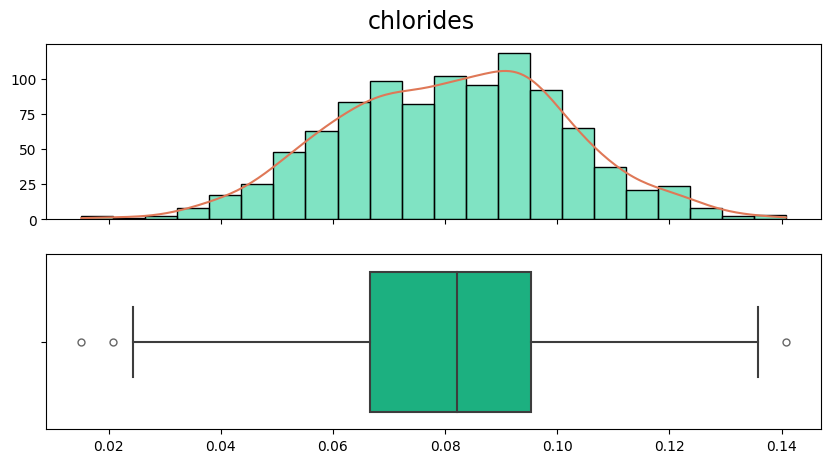

In [31]:
# Untuk kolom chlorides
hist_box_plot(anggur, anggur.columns[4])


- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (_positive skewed_).
- Berdasarkan boxplot, terlihat bahwa data _cholrides_ memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya sedikit lebih dari 0.02 dan maksimumnya sedikit kurang dari 0.14 serta mediannya di sedikit di atas 0.08.
- Beberapa _outliers_ terlihat di bawah nilai minimumnya dan di atas nilai maksimumnya.


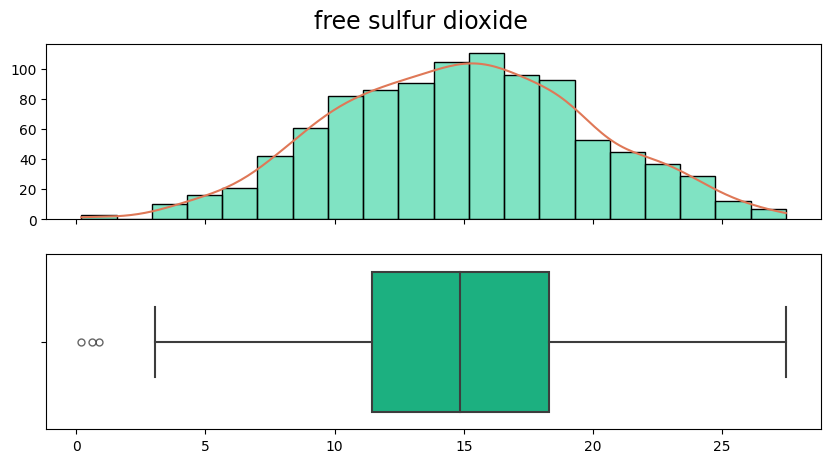

In [32]:
# Untuk kolom free sulfur dioxide
hist_box_plot(anggur, anggur.columns[5])


- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (_positive skewed_).
- Berdasarkan boxplot, terlihat bahwa data _free sulfur dioxied_ memiliki rentang nilai yangs kecil.
- Nilai minimumnya berada di antara 0 dan 5 serta maksimumnya lebih dari.25 serta mediannya sekitar 15.
- Tidak terdapat _outliers_ yang terlihat di bawah atas nilai maksimumnya tapi terlihat beberapa di bawah minimumnya.


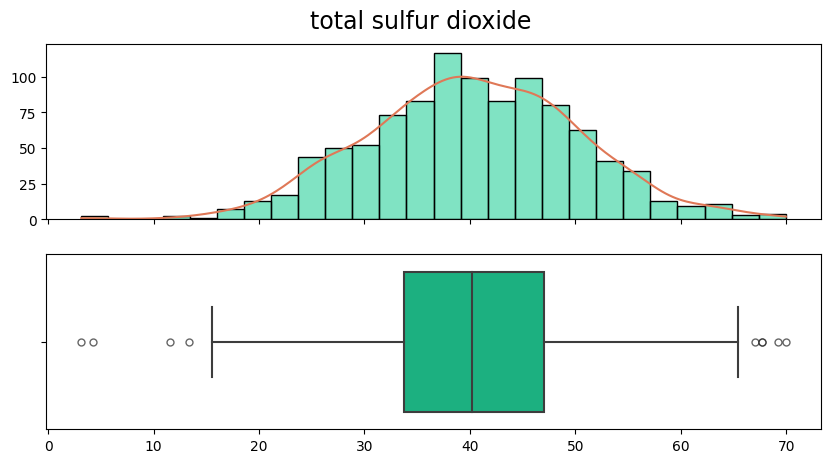

In [33]:
# Untuk kolom total sulfur dioxide
hist_box_plot(anggur, anggur.columns[6])


- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kiri (_negative skewed_) yang hampir tidak terlihat.
- Berdasarkan boxplot, terlihat bahwa data _total sulfur dioxied_ memiliki rentang nilai yang cukup besar.
- Nilai minimumnya sekitar 15 dan maksimumnya sekitar 65 serta mediannya sekitar 40.
- Beberapa _outliers_ terlihat di bawah nilai minimumnya dan di atas nilai maksimumnya.


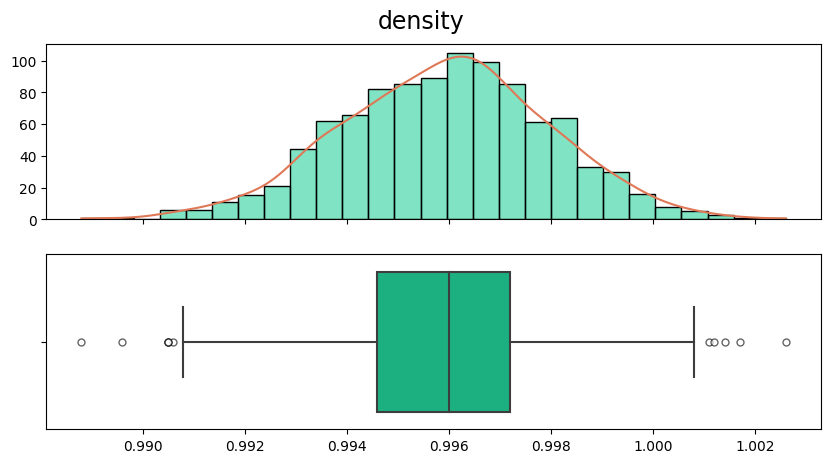

In [34]:
# Untuk kolom density
hist_box_plot(anggur, anggur.columns[7])


- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (_positive skewed_) yang hampir tidak terlihat.
- Berdasarkan boxplot, terlihat bahwa data _density_ memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya sekitar 0.991 dan maksimumnya sekitar 1,001 serta mediannya sekitar 0.996.
- Beberapa _outliers_ terlihat di bawah nilai minimumnya dan di atas nilai maksimumnya.


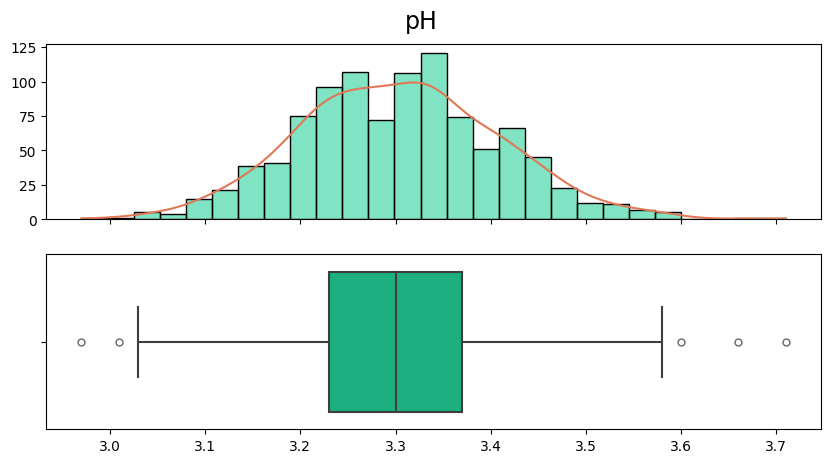

In [35]:
# Untuk kolom pH
hist_box_plot(anggur, anggur.columns[8])


- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kiri (_negative skewed_) yang hampir tidak terlihat.
- Berdasarkan boxplot, terlihat bahwa data _pH_ memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya sekitar 3 dan maksimumnya sekitar 3.6 serta mediannya sekitar 3.3.
- Beberapa _outliers_ terlihat di bawah nilai minimumnya dan di atas nilai maksimumnya.


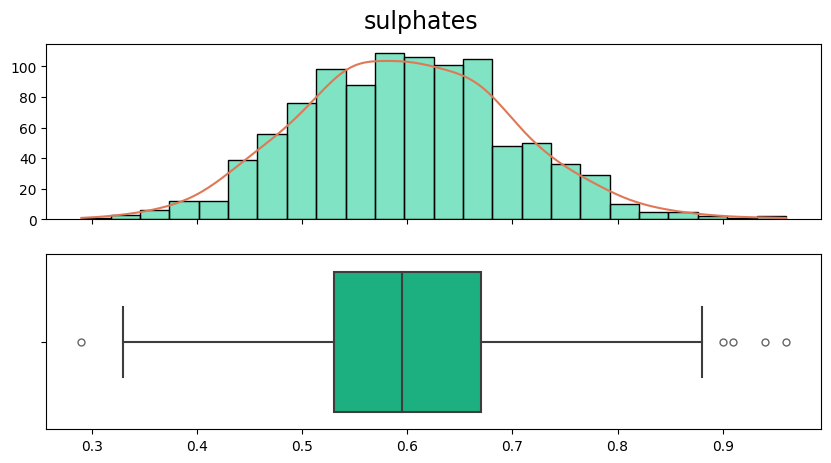

In [36]:
# Untuk kolom sulphates
hist_box_plot(anggur, anggur.columns[9])


- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (_positive skewed_).
- Berdasarkan boxplot, terlihat bahwa data _sulphates_ memiliki rentang nilai yang sangat kecil.
- Nilai minimumnya sekitar 0.3 dan maksimumnya sekitar 0.9 serta mediannya sekitar 0.6.
- Beberapa _outliers_ terlihat di atas nilai maksimumnya dan terdapat 1 outliers di bawah nilai minimumnya.


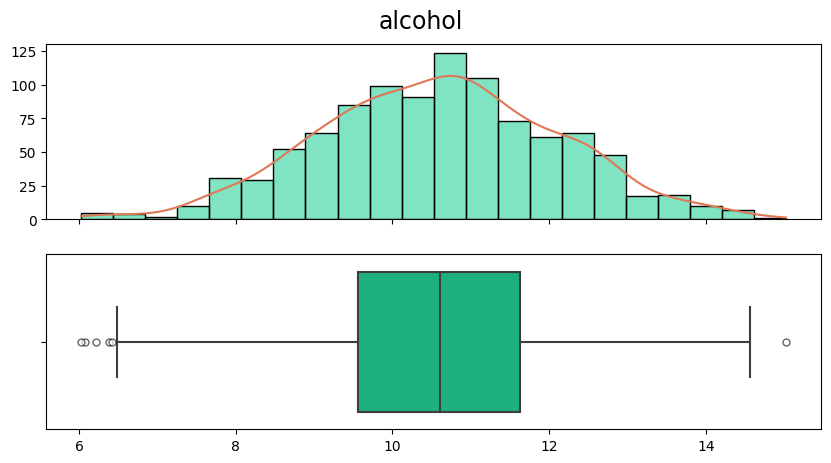

In [37]:
# Untuk kolom alcohol
hist_box_plot(anggur, anggur.columns[10])


- Berdasarkan histogram, terlihat bahwa data terdistribusi mendekati normal dengan sedikit condong kanan (_positive skewed_).
- Berdasarkan boxplot, terlihat bahwa data _alcohol_ memiliki rentang nilai yang kecil.
- Nilai minimumnya sekitar 6 dan maksimumnya sekitar 14 serta mediannya sekitar 10.
- Beberapa _outliers_ terlihat di bawah nilai minimumnya dan terdapat 1 outliers di atas nilai maksimumnya.


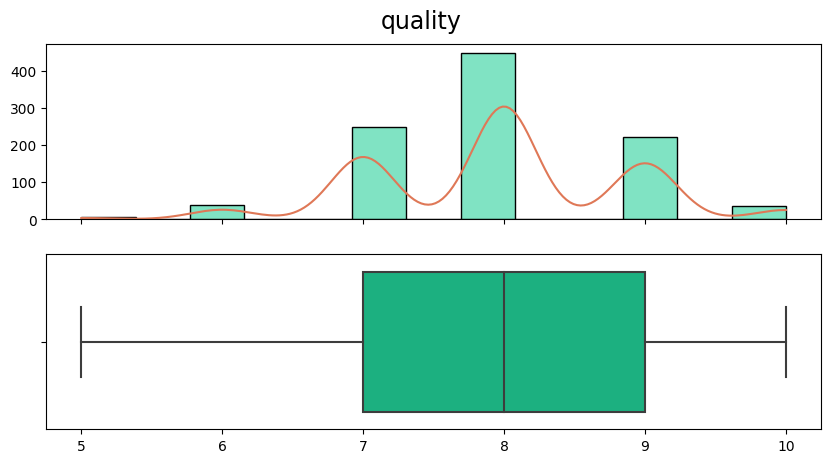

In [38]:
# Untuk kolom alcohol
hist_box_plot(anggur, anggur.columns[11])


- Berdasarkan histogram, terlihat bahwa data terdistribusi normal.
- Berdasarkan boxplot, terlihat bahwa data _quailty_ memiliki rentang nilai cukup kecil.
- Nilai minimumnya 5 dan maksimumnya sekitar 10 serta mediannya 8.
- Pada data ini pula tidak terdapat _outliers_.


### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.


In [39]:
def normality(column):
    k2,p = st.normaltest(anggur[column])
    alpha = 5e-2
    display(Markdown("Nilai *D'Agostino's K-squared Test*, p = {:g}".format(p)))
    if p < alpha:  
        display(Markdown(f"Karena $p < {alpha}$, maka data kolom {column} normal"))
    else:
        display(Markdown(f"Karena $p > {alpha}$, maka data kolom {column} normal"))
    fig, ax1 =plt.subplots(nrows=1,ncols = 1, figsize=(10, 2.5), sharex=True)
    g1 = sns.histplot(data = anggur, x = column, ax=ax1, color="#03c9c9", kde = True, line_kws={"linewidth": 1.5, "alpha": 1})
    g1.lines[0].set_color('#c91703')
    g1.set(ylabel=None)
    g1.set(xlabel=None)
    fig.suptitle("Normality test ", y =1, fontsize = 17)


Nilai *D'Agostino's K-squared Test*, p = 0.930858

Karena $p > 0.05$, maka data kolom fixed acidity normal

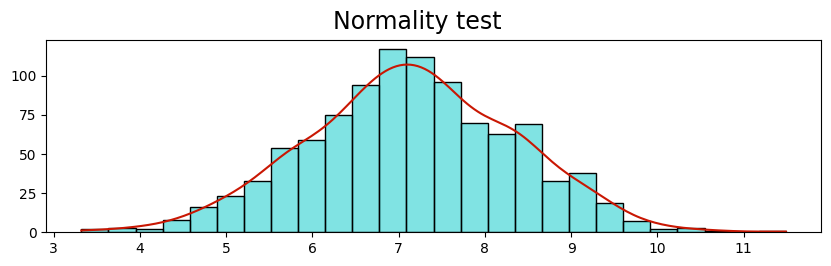

In [40]:
normality(anggur.columns[0])

Nilai *D'Agostino's K-squared Test*, p = 0.0225815

Karena $p < 0.05$, maka data kolom volatile acidity normal

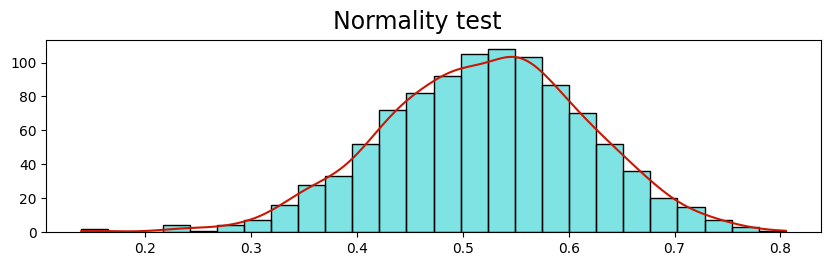

In [41]:
normality(anggur.columns[1])

Nilai *D'Agostino's K-squared Test*, p = 0.68169

Karena $p > 0.05$, maka data kolom citric acid normal

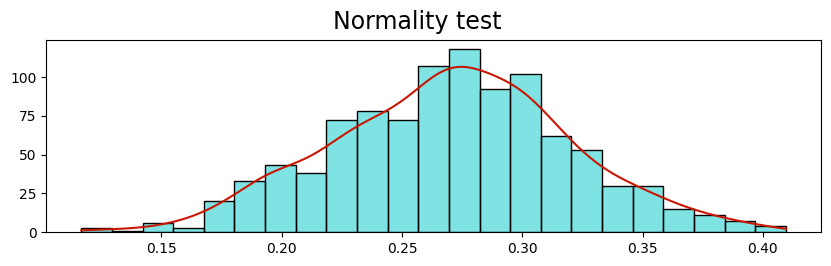

In [42]:
normality(anggur.columns[2])

Nilai *D'Agostino's K-squared Test*, p = 0.224667

Karena $p > 0.05$, maka data kolom residual sugar normal

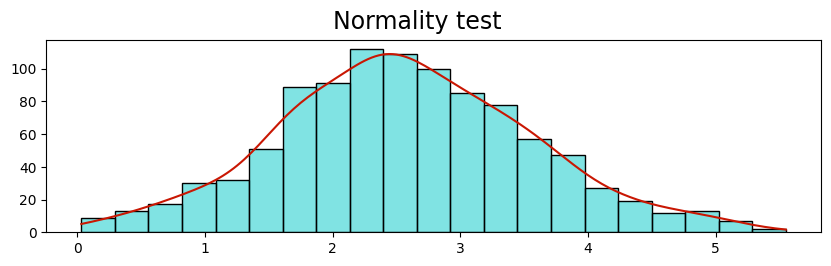

In [43]:
normality(anggur.columns[3])

Nilai *D'Agostino's K-squared Test*, p = 0.170483

Karena $p > 0.05$, maka data kolom chlorides normal

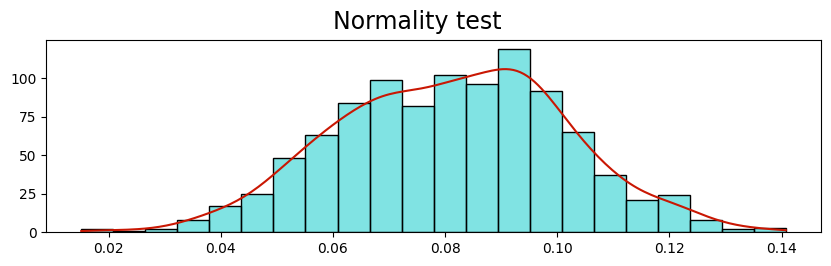

In [44]:
normality(anggur.columns[4])

Nilai *D'Agostino's K-squared Test*, p = 0.0174304

Karena $p < 0.05$, maka data kolom free sulfur dioxide normal

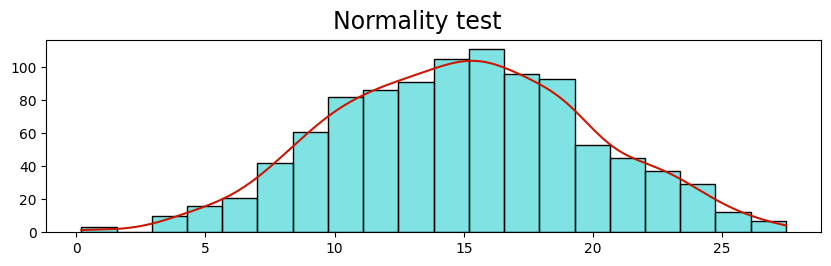

In [45]:
normality(anggur.columns[5])

Nilai *D'Agostino's K-squared Test*, p = 0.848885

Karena $p > 0.05$, maka data kolom total sulfur dioxide normal

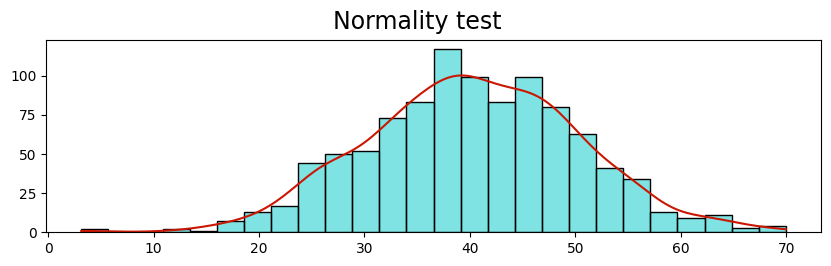

In [46]:
normality(anggur.columns[6])

Nilai *D'Agostino's K-squared Test*, p = 0.598523

Karena $p > 0.05$, maka data kolom density normal

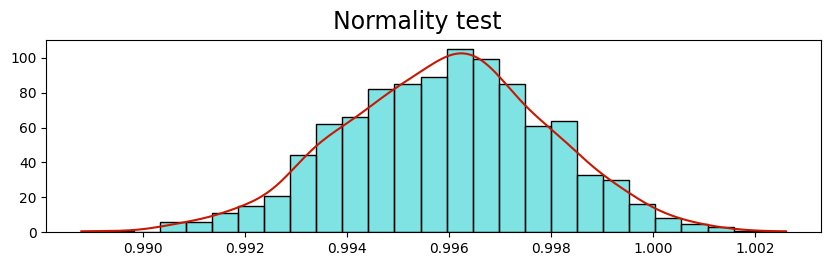

In [47]:
normality(anggur.columns[7])

Nilai *D'Agostino's K-squared Test*, p = 0.136787

Karena $p > 0.05$, maka data kolom pH normal

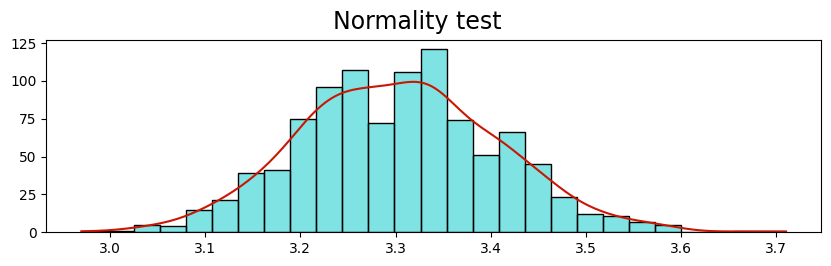

In [48]:
normality(anggur.columns[8])

Nilai *D'Agostino's K-squared Test*, p = 0.138843

Karena $p > 0.05$, maka data kolom sulphates normal

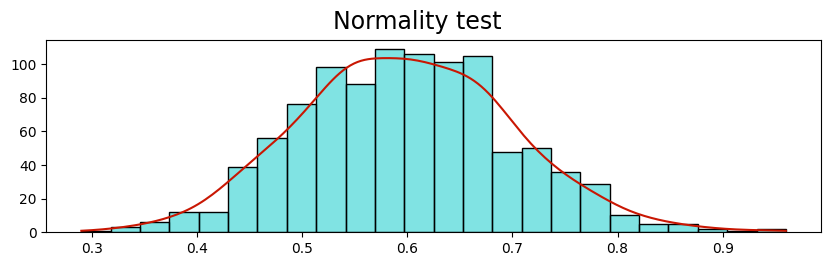

In [49]:
normality(anggur.columns[9])

Nilai *D'Agostino's K-squared Test*, p = 0.679088

Karena $p > 0.05$, maka data kolom alcohol normal

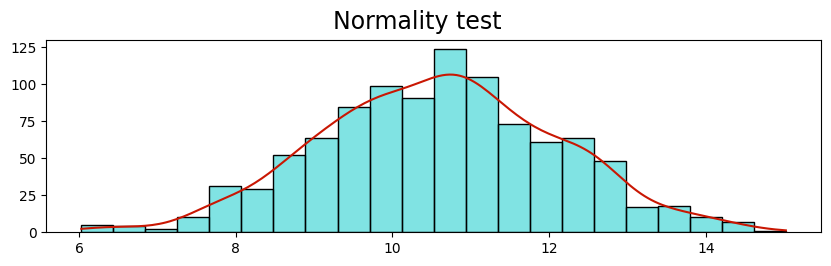

In [50]:
normality(anggur.columns[10])

Nilai *D'Agostino's K-squared Test*, p = 0.388814

Karena $p > 0.05$, maka data kolom quality normal

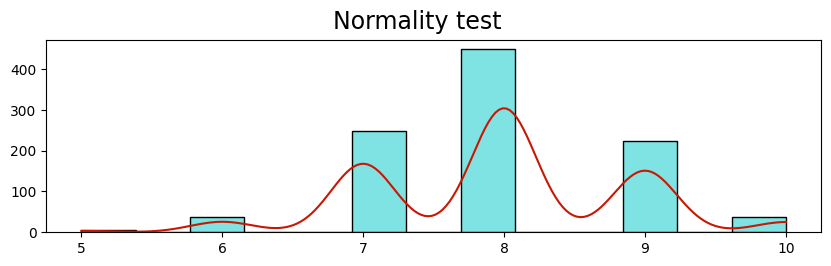

In [51]:
normality(anggur.columns[11])

### 4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.


#### Langkah Testing :

1. Tentukan Hipotesis nol ($H_0: \theta = \theta_0$), dimana $\theta$ bisa berupa $\theta$, $\theta$, $p$, atau data lain berdistribusi tertentu(Normal, binomial, dsc.)
2. Pilih hipotesis alternatif $H_1$ salah dari dari $\theta > \theta_0$ , $\theta < \theta_0$ , atau $\theta \neq \theta_0$
3. Tentukan tingkat signifikan $\alpha$
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung _p-value_ sesuai dengan uji statistik yang
   digunakan.
6. Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika _p-value_ lebih kecil dibanding tingkat signifikansi $\alpha$ yang diinginkan


In [53]:
def hypothesis_testing(sample : pd.DataFrame, theta0 : float, alternative : str, alpha : float) -> tuple[str, float]  :  
    # sample       : dataframe yang memiliki 1 kolom.
    # theta0       : null hypothesis.
    # alternative  : alternative hypothesis.
    # alpha        : The significance level.

    # (str, float) : tuple berisi decision dan p-value.
  
    z, p_value = ztest(sample, value=theta0, alternative=alternative)

    if alternative == 'larger':
        # Jika alternative hypothesis lebih besar
        crit_val = st.norm.ppf(1 - alpha)
        if z > crit_val:
            decision = 'Reject H0'
        else:
            decision = 'Fail to reject H0'

    elif alternative == 'smaller':
        # Jika alternative hypothesis lebih kecil
        crit_val = st.norm.ppf(alpha)
        if z < crit_val:
            decision = 'Reject H0'
        else:
            decision = 'Fail to reject H0'

    elif alternative == 'two-sided':
        # Jika alternative hypothesis 2 sisi
        crit_val = st.norm.ppf(1 - alpha / 2)
        if abs(z) > crit_val:
            decision = 'Reject H0'
        else:
            decision = 'Fail to reject H0'

    else:
        raise ValueError("Invalid alternative hypothesis.")

    return decision, p_value

TypeError: 'type' object is not subscriptable